 # RETAIL CASE STUDY - PROJECT 1

In [154]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Q1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly 

In [110]:
#first we'll import all three sheets
cust= pd.read_csv(r"C:\Users\preet\Downloads\Python Foundation Case Study 1 - Retail Case Study\Customer.csv")
product= pd.read_csv(r"C:\Users\preet\Downloads\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv")
transaction= pd.read_csv(r"C:\Users\preet\Downloads\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv")
 # renaming the product column name prod subcat code to make it same
    
product.rename(columns= {'prod_sub_cat_code': 'prod_subcat_code'}, inplace= True)


In [111]:
#merging of data
df = pd.merge(left= transaction, right = cust , how= 'inner', left_on='cust_id', right_on='customer_Id')
df = pd.merge(left= df, right= product, how='inner' ,on= ['prod_cat_code','prod_subcat_code']) 
df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,Women


In [112]:
#dropping duplicates for further analysis
df.drop_duplicates(inplace= True)

## Q2. Prepare a summary report for the merged data set.

### a. Get the column names and their corresponding data types

In [113]:
#column names and their economy
df.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
prod_cat             object
prod_subcat          object
dtype: object

### b. Top/Bottom 10 observations

In [114]:
#for top 10
df.head(10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
5,4737317330,269345,29-07-2011,1,1,5,1141,599.025,6304.025,MBR,269345,26-06-1970,F,10.0,Clothing,Women
6,44425889101,274987,18-03-2012,1,1,4,897,376.740,3964.740,Flagship store,274987,08-10-1983,M,2.0,Clothing,Women
7,90501340928,271817,19-02-2012,1,1,1,1122,117.810,1239.810,TeleShop,271817,24-12-1989,M,8.0,Clothing,Women
8,99335419136,268755,13-12-2012,1,1,3,1181,372.015,3915.015,e-Shop,268755,15-07-1984,F,8.0,Clothing,Women
9,35030444164,268129,18-11-2011,1,1,5,1047,549.675,5784.675,MBR,268129,07-08-1982,F,9.0,Clothing,Women


In [33]:
#for bottom 10
df.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
23043,3387244829,269114,15-07-2011,4,4,1,388,40.740,428.740,e-Shop,269114,22-01-1989,F,5.0,Bags,Women
23044,76906459516,267940,15-06-2011,4,4,2,1263,265.230,2791.230,Flagship store,267940,09-06-1979,M,9.0,Bags,Women
23045,73549617163,271334,5/7/2011,4,4,5,263,138.075,1453.075,e-Shop,271334,08-12-1983,F,10.0,Bags,Women
23046,75339646315,274827,2/5/2011,4,4,4,1381,580.020,6104.020,e-Shop,274827,27-12-1988,F,8.0,Bags,Women
23047,6650926717,268110,5/4/2011,4,4,4,1036,435.120,4579.120,MBR,268110,06-03-1976,M,2.0,Bags,Women
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,Women
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,273723,21-01-1984,F,4.0,Bags,Women


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [115]:
summary= df.loc[:,['Qty','Rate', 'Tax']].describe()
#here 50% is median
summary.loc[['min','25%','50%', '75%', 'max']]

,Qty,Rate,Tax
min,-5.0,-1499.0,7.3500
25%,1.0,312.0,98.2800
50%,3.0,710.0,199.0800
75%,4.0,1109.0,365.7675
max,5.0,1500.0,787.5000


## Q2. Frequency tables for all the categorical variables

In [116]:
df.loc[:,df.dtypes=="object"].describe()

,tran_date,Store_type,DOB,Gender,prod_cat,prod_subcat
count,23040,23040,23040,23031,23040,23040
unique,1129,4,3987,2,6,18
top,13-07-2011,e-Shop,27-12-1988,M,Books,Women
freq,35,9304,32,11804,6066,3046


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

array([[<AxesSubplot:title={'center':'Qty'}>,
        <AxesSubplot:title={'center':'Rate'}>],
       [<AxesSubplot:title={'center':'Tax'}>,
        <AxesSubplot:title={'center':'total_amt'}>]], dtype=object)

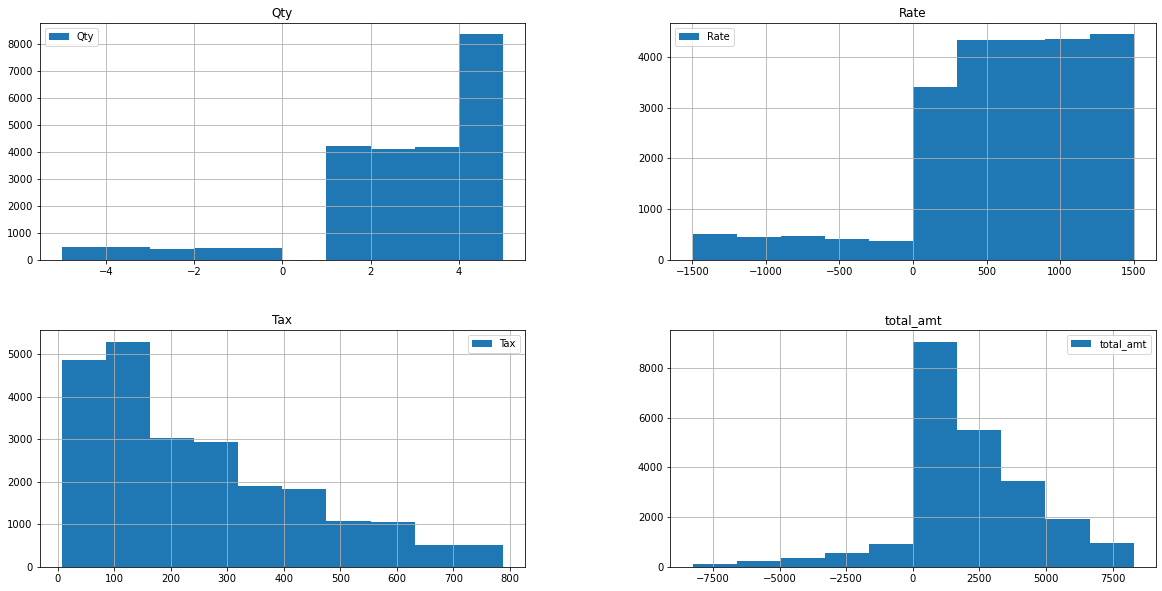

In [129]:
#now we'll create histograms
#for continuous variables
df.hist(column=['Qty', 'Rate', 'Tax', 'total_amt'], figsize= (20,10),legend=True )

C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

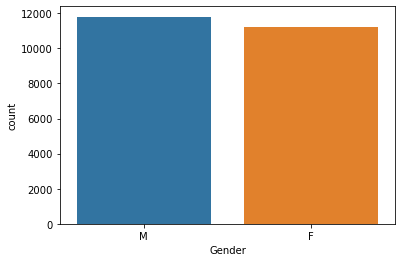

In [158]:
#now bar chart on categorical data
sns.countplot( df.Gender)

C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_type', ylabel='count'>

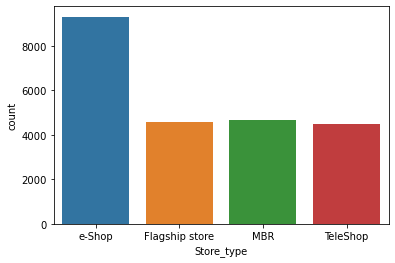

In [161]:
sns.countplot( df.Store_type)

C:\Users\preet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_cat', ylabel='count'>

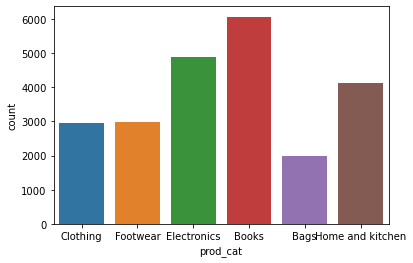

In [162]:
sns.countplot( df.prod_cat)

<AxesSubplot:xlabel='count', ylabel='prod_subcat'>

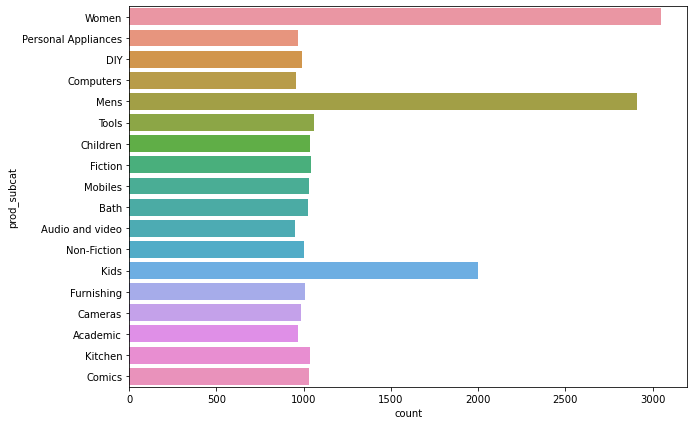

In [170]:
plt.figure(figsize=(10,7))
sns.countplot(y= df.prod_subcat)

## 4. Calculate the following information using the merga. Time period of the available transaction data

### a. Time period of the available transaction data


In [61]:
# first we'll replace / by - to make the format of the dates same
df['tran_date']=df['tran_date'].str.replace('/','-', regex=True)
#then we'll change the datatype of trans_date and DOB to datetime64 
df['tran_date']=pd.to_datetime(df.tran_date, format='%d-%m-%Y')
df['DOB']=pd.to_datetime(df.DOB, format='%d-%m-%Y')
#time period for available tran_data
m= df['tran_date'].min()
print("earliest date: ", m)
n= df['tran_date'].max()
print("latest date: ",n)
o=n.year -m.year
print("Time period between these two dates are :", o, "years")


earliest date:  2011-01-25 00:00:00
latest date:  2014-02-28 00:00:00
Time period between these two dates are : 3 years


### b. Count of transactions where the total amount of transaction was negative

In [38]:
neg_amt=df.total_amt[(df['total_amt']<0)].count()

print('count of transactions where total amount is negative are ', neg_amt)

count of transactions where total amount is negative are  2164


## Q5. Analyze which product categories are more popular among females vs male customers.

In [94]:
df.groupby(by= [ 'Gender','prod_cat']).Qty.sum()



Gender  prod_cat        
F       Bags                2364
        Books               7080
        Clothing            3425
        Electronics         5832
        Footwear            3721
        Home and kitchen    4898
M       Bags                2346
        Books               7587
        Clothing            3748
        Electronics         6486
        Footwear            3561
        Home and kitchen    5051
Name: Qty, dtype: int64

#### -- Conclusion : Here we can see that products that are popular in females are Footwear and bags, rest all are popular in males.

## Q6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [40]:
customers= df.groupby(by = 'city_code').cust_id.count() 
customers= (df.groupby(by = 'city_code').cust_id.count()/customers.sum()) *100
customers.sort_values(ascending=False).head(1)

city_code
4.0    10.515804
Name: cust_id, dtype: float64

## Q7. Which store type sells the maximum products by value and by quantity?

In [41]:
#store type with maximum quantity
qtyy=df.groupby(by='Store_type').Qty.sum()
qtyy.sort_values(ascending= False).head(1)

Store_type
e-Shop    22790
Name: Qty, dtype: int64

In [42]:
#store type with maximum value
amt=df.groupby(by='Store_type').total_amt.sum()
amt.sort_values(ascending=False).head(1)

Store_type
e-Shop    1.984262e+07
Name: total_amt, dtype: float64

## Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [43]:
t_amt=df[df.Store_type=='Flagship store' ].groupby(by='prod_cat').total_amt.sum()
t_amt=t_amt.loc[['Electronics','Clothing'] ]
print('total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is ',t_amt.sum() )

total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is  3409559.27


## Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [44]:
elec_category= df[df.Gender=='M'].groupby(by= 'prod_cat').total_amt.sum()
elec_category= elec_category.loc['Electronics']
print("total amount earned from 'Male' customers under the 'Electronics' category is ", elec_category)

total amount earned from 'Male' customers under the 'Electronics' category is  5711351.62


## Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [45]:
l=df[df.total_amt>0].groupby(by = 'cust_id').cust_id.count()
l=pd.DataFrame(l)
l=l[l.cust_id>10].count()
l= pd.Series(l)
print('customers having more than 10 unique transactions, after removing all transactions are ', l)

customers having more than 10 unique transactions, after removing all transactions are  cust_id    6
dtype: int64


## Q11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [56]:
# FIRST WE'LL CREATE AN AGE COLUMN AND CALCULATE THE AGE
today= pd.Timestamp.now()
today.year
df['age'] = today.year - df['DOB'].dt.year

In [84]:
TA= df[(df.age>=25) & (df.age<=35)].groupby(by= 'prod_cat').total_amt.sum()
TA= TA.loc[['Electronics','Books']].sum()
print("Total amt spent for “Electronics” and “Books” product categories ",
      "for all customers aged between 25 - 35 is" , TA)

Total amt spent for “Electronics” and “Books” product categories  for all customers aged between 25 - 35 is 6058458.640000001


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [91]:
amount= df[(df.age>=25) & (df.age<=35)& (df.tran_date>'01-01-2014')&(df.tran_date<'01-03-2014')].total_amt.sum()
print('total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is', amount)

total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is 13654.485
